In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


#load smartwatch
sw_plot_dir = f'./plots/sw_data.png'


sw_csv_dir = "/standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/5/smartwatch_data/sync_smartwatch.csv"

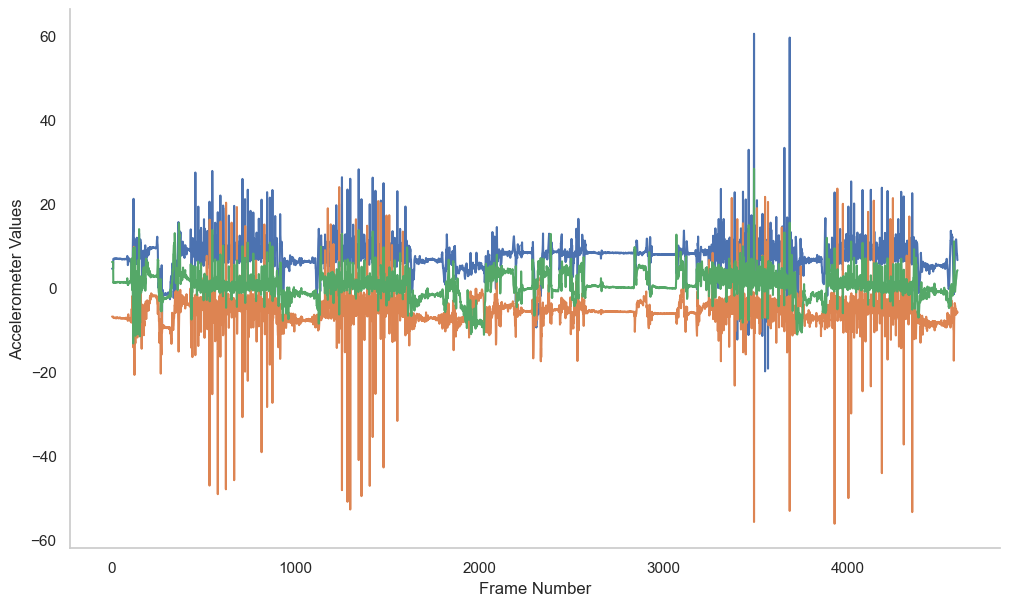

In [5]:


def plot_data(csv_file, sw_plot_dir):
    # Load and prepare data
    df = pd.read_csv(csv_file, index_col=False)
    df['seq_num'] = range(1, len(df) + 1)
    
    # Reshape data for easier plotting with Seaborn
    df_long = pd.melt(df, id_vars=['seq_num'], value_vars=['sw_value_X_Axis', 'sw_value_Y_Axis', 'sw_value_Z_Axis'],
                      var_name='Axis', value_name='Value')
    
    # Set Seaborn theme for better aesthetics
    sns.set_theme(style="whitegrid")
    
    # Plot using Seaborn's lineplot for smoother visuals
    plt.figure(figsize=(12, 7))
    sns.lineplot(data=df_long, x='seq_num', y='Value', hue='Axis')
    
    # Adding labels and title
    plt.xlabel('Frame Number')
    plt.ylabel('Accelerometer Values')
    # plt.title('Smartwatch Accelerometer Data')
    
    # remove legend
    plt.legend().remove()

    # remove grid and spines
    plt.grid(False)
    sns.despine()
    # make background transparent
    plt.savefig(sw_plot_dir, dpi=600, format='png', transparent=True)

    plt.show()
    plt.close()

plot_data(sw_csv_dir, sw_plot_dir)
